In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import tz
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
!wget https://www.dropbox.com/scl/fi/e2y5m0h9qbr9sni6f2wdm/kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3&dl=0

--2023-09-10 21:23:43--  https://www.dropbox.com/scl/fi/e2y5m0h9qbr9sni6f2wdm/kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/e2y5m0h9qbr9sni6f2wdm/kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3 [following]
--2023-09-10 21:23:43--  https://www.dropbox.com/e/scl/fi/e2y5m0h9qbr9sni6f2wdm/kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce9ed76fca3022f652d79e929d5.dl.dropboxusercontent.com/cd/0/inline/CDfX4VMqRLMt0CL5kQ_BChCap1QeLrsrphyE5MoPayl8QWXvbuVH-1pokfqCAgYnZinTxcPXPKfz9p8EpAEgwKW72QQ5PFALas8czN3f3ZABZuawOGzYyF37_x2D44W2ajOa8JZtafzBN2eJrCUStCXZ/file# [following]
--2023-09-10 21:23:44--  https://uce

In [ ]:
# Read the CSV file
df = pd.read_csv('kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3')

# Display the DataFrame
print(df)

      id   age    bp     sg   al   su     rbc        pc         pcc          ba    bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe  ane classification
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no   no            ckd
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   no            ckd
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no  yes            ckd
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes  yes            ckd
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent  106.0  26.0  1.4    NaN  NaN  11.6  35 

In [ ]:
import pandas as pd

# Read the CSV file

# Drop rows with any NaN values
df.dropna(inplace=True)

# Modify column names in the numeric_features list
numeric_features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
numeric_features = [col.replace(' ', '_') for col in numeric_features]

# Convert numeric features to floats
df[numeric_features] = df[numeric_features].astype(float)

# Rename columns for better readability
column_names = {
    'age': 'Age',
    'bp': 'Blood_Pressure',
    'sg': 'Specific_Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'bgr': 'Blood_Glucose_Random',
    'bu': 'Blood_Urea',
    'sc': 'Serum_Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed_Cell_Volume',
    'wc': 'White_Blood_Cell_Count',
    'rc': 'Red_Blood_Cell_Count',
    'classification': 'Classification'
}

df.rename(columns=column_names, inplace=True)

# Set display options for better alignment
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Set display width

# Display beautified dataset
print(df)




      id   Age  Blood_Pressure  Specific_Gravity  Albumin  Sugar       rbc        pc         pcc          ba  Blood_Glucose_Random  Blood_Urea  Serum_Creatinine  Sodium  Potassium  Hemoglobin  Packed_Cell_Volume  White_Blood_Cell_Count  Red_Blood_Cell_Count  htn   dm  cad appet   pe  ane Classification
3      3  48.0            70.0             1.005      4.0    0.0    normal  abnormal     present  notpresent                 117.0        56.0               3.8   111.0        2.5        11.2                32.0                  6700.0                   3.9  yes   no   no  poor  yes  yes            ckd
9      9  53.0            90.0             1.020      2.0    0.0  abnormal  abnormal     present  notpresent                  70.0       107.0               7.2   114.0        3.7         9.5                29.0                 12100.0                   3.7  yes  yes   no  poor   no  yes            ckd
11    11  63.0            70.0             1.010      3.0    0.0  abnormal  abnormal    

In [ ]:


# List of categorical feature column names
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Feature selection using ANOVA F-value
num_features_to_select = 10  # Adjust this as needed
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_new = selector.fit_transform(df_encoded.drop(columns=['Classification']), df_encoded['Classification'])
selected_indices = selector.get_support(indices=True)
selected_features = df_encoded.drop(columns=['Classification']).columns[selected_indices]

# Split Dataset
X = X_new  # Features with selected features
y = df_encoded['Classification']  # Target

# Split dataset into train and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder

# Encode target classes into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model Selection and Training
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svm = SVC(probability=True)  # Set probability=True for SVC

# Train the models on the training data
model_rf.fit(X_train, y_train_encoded)
model_xgb.fit(X_train, y_train_encoded)
model_svm.fit(X_train, y_train_encoded)

# Model Evaluation
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

# Calculate probabilities for ROC
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]

# Convert predictions back to original class labels
y_pred_rf_original = label_encoder.inverse_transform(y_pred_rf)
y_pred_xgb_original = label_encoder.inverse_transform(y_pred_xgb)
y_pred_svm_original = label_encoder.inverse_transform(y_pred_svm)

accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)

# Display accuracy of each model
print("Random Forest Accuracy:", accuracy_rf)
print("XGBoost Accuracy:", accuracy_xgb)
print("SVM Accuracy:", accuracy_svm)





Random Forest Accuracy: 1.0
XGBoost Accuracy: 1.0
SVM Accuracy: 1.0


In [ ]:
from sklearn.metrics import f1_score, precision_score

# Calculate F1-score for each model
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted')

# Calculate precision for each model
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted')
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
precision_svm = precision_score(y_test_encoded, y_pred_svm, average='weighted')

# Display F1-score and precision for each model
print("Random Forest F1-score:", f1_rf)
print("XGBoost F1-score:", f1_xgb)
print("SVM F1-score:", f1_svm)

print("Random Forest Precision:", precision_rf)
print("XGBoost Precision:", precision_xgb)
print("SVM Precision:", precision_svm)


Random Forest F1-score: 1.0
XGBoost F1-score: 1.0
SVM F1-score: 1.0
Random Forest Precision: 1.0
XGBoost Precision: 1.0
SVM Precision: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# List of categorical feature column names
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Split Dataset
X = df_encoded.drop(columns=['Classification'])  # Features
y = df_encoded['Classification']  # Target

from sklearn.preprocessing import LabelEncoder

# Encode target classes into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Model Selection and Training
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svm = SVC(probability=True)



In [ ]:
# Perform k-fold cross-validation
cv_scores_rf = cross_val_score(model_rf, X, y_encoded, cv=5)
cv_scores_xgb = cross_val_score(model_xgb, X, y_encoded, cv=5)
cv_scores_svm = cross_val_score(model_svm, X, y_encoded, cv=5)

# Calculate mean accuracy for each model
mean_accuracy_rf = cv_scores_rf.mean()
mean_accuracy_xgb = cv_scores_xgb.mean()
mean_accuracy_svm = cv_scores_svm.mean()

# Display cross-validation scores and mean accuracy
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("XGBoost Cross-Validation Scores:", cv_scores_xgb)
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb)
print("Mean Accuracy (SVM):", mean_accuracy_svm)


Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
XGBoost Cross-Validation Scores: [0.59375    1.         1.         1.         0.87096774]
SVM Cross-Validation Scores: [0.75       0.78125    0.8125     0.83870968 0.77419355]
Mean Accuracy (Random Forest): 1.0
Mean Accuracy (XGBoost): 0.8929435483870968
Mean Accuracy (SVM): 0.7913306451612904


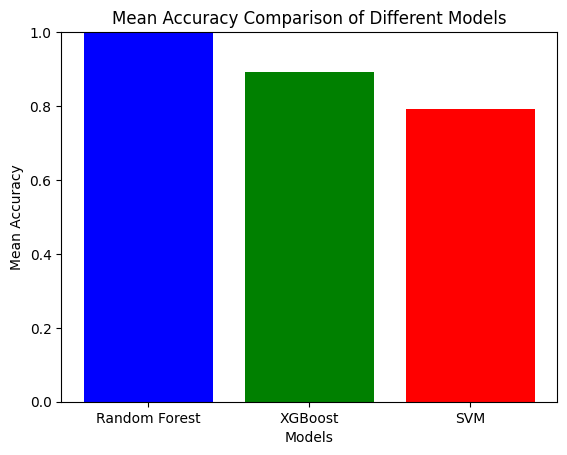

In [ ]:
import matplotlib.pyplot as plt

# List of model names
model_names = ['Random Forest', 'XGBoost', 'SVM']

# List of mean accuracies
mean_accuracies = [mean_accuracy_rf, mean_accuracy_xgb, mean_accuracy_svm]

# Create a bar chart to visualize mean accuracies
plt.bar(model_names, mean_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy Comparison of Different Models')
plt.ylim(0, 1.0)  # Set the y-axis range
plt.show()


In [ ]:
# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation for each model
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5)
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

grid_search_rf.fit(X_train, y_train_encoded)
grid_search_xgb.fit(X_train, y_train_encoded)
grid_search_svm.fit(X_train, y_train_encoded)

best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_svm = grid_search_svm.best_estimator_

# Evaluate the best models
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)
y_pred_best_svm = best_svm.predict(X_test)

print("Best Random Forest Model:")
print(classification_report(y_test_encoded, y_pred_best_rf))

print("Best XGBoost Model:")
print(classification_report(y_test_encoded, y_pred_best_xgb))

print("Best SVM Model:")
print(classification_report(y_test_encoded, y_pred_best_svm))


Best Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Best XGBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Best SVM Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg

Cross-Validation Scores:

For Random Forest, all five cross-validation scores are 1.0. This means that in every fold of cross-validation, the accuracy of the Random Forest model was 100%, indicating that it made correct predictions for all instances in each fold.
For XGBoost, the cross-validation scores are a bit varied. They range from 0.59375 to 1.0. In some folds, the accuracy was lower (0.59375) while in others it was perfect (1.0). This suggests that XGBoost performed differently across different splits of the data.
For SVM, the cross-validation scores vary as well, ranging from 0.75 to 0.83870968. Similar to XGBoost, the accuracy of SVM varies across different folds.
Mean Accuracy:

The mean accuracy is the average of the cross-validation scores for each model. It gives us an overall idea of how well the model is performing across different folds of the data.
For Random Forest, the mean accuracy is 1.0, which means it consistently achieved 100% accuracy across all cross-validation folds.
For XGBoost, the mean accuracy is 0.8929435483870968, which is lower than 1.0. This indicates that while XGBoost performed well on average, it did have some variability in its accuracy across different folds.
For SVM, the mean accuracy is 0.7913306451612904, which is lower than both Random Forest and XGBoost. This suggests that SVM had a lower average accuracy compared to the other two models.
Overall, the results show that Random Forest had the highest and most consistent accuracy across cross-validation folds, followed by XGBoost, and then SVM. Keep in mind that cross-validation helps us assess the models' generalization performance and identify how well they are likely to perform on new, unseen data. In this case, Random Forest appears to be the most promising model based on these results.